In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [50]:
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [51]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['rocha', 'rikitea', 'kapaa', 'alice springs', 'shimoda', 'bluff', 'beaumont', 'hobart', 'ishigaki', 'gat', 'atuona', 'avarua', 'pevek', 'marrakesh', 'busselton', 'puerto ayora', 'arraial do cabo', 'gawler', 'cape town', 'attawapiskat', 'tukrah', 'palanga', 'pangnirtung', 'ilulissat', 'chuy', 'qaanaaq', 'ushuaia', 'cumaribo', 'aklavik', 'albany', 'barbar', 'tiksi', 'port-gentil', 'barrow', 'faanui', 'skibbereen', 'mataura', 'khatanga', 'palasa', 'makakilo city', 'port elizabeth', 'minchinabad', 'richards bay', 'vaini', 'jalu', 'bara', 'kaitangata', 'pisco', 'robertsport', 'plerin', 'castro', 'general pico', 'bandarbeyla', 'mar del plata', 'luang prabang', 'mahbubabad', 'linxia', 'bredasdorp', 'rawson', 'karasburg', 'crab hill', 'fortuna', 'durango', 'saldanha', 'baherden', 'gueret', 'havoysund', 'thompson', 'nanortalik', 'flinders', 'jos', 'ilhabela', 'belushya guba', 'yar-sale', 'boa vista', 'leningradskiy', 'punta arenas', 'phan thiet', 'cherskiy', 'kenai', 'miraflores', 'samusu', 'k

In [52]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=24625c741fe3a225014cb5cf710a199f&q=


In [53]:
name = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind = []
country = []
date = []
y = 1

print("Beginning Data Retrieval")
print("--------------------------------")

for city in cities:
    city = requests.get(query_url + city).json()
    try:
        name.append(city["name"])
        lat.append(city["coord"]["lat"])
        lng.append(city["coord"]["lon"])
        temp.append(city["main"]["temp"])
        humidity.append(city["main"]["humidity"])
        cloudiness.append(city["clouds"]["all"])
        wind.append(city["wind"]["speed"])
        country.append(city["sys"]["country"])
        date.append(city["dt"])
        print("Processing Record" + [y] + "|" + [city])
        y = y+1
    except:
        print("City not found. Skipping ...")


Beginning Data Retrieval
--------------------------------
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found

City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found

City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found. Skipping ...
City not found

In [48]:
city_df = pd.DataFrame({"City": name,
                       "Lat": lat,
                       "Lng": lng,
                       "Max Temp": temp,
                       "Humidity": humidity,
                       "Cloudiness": cloudiness,
                       "Wind Speed": wind,
                       "Country": country,
                       "Date": date
                       })
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ossora,59.2353,163.0719,273.80,99,100,2.81,RU,1618539171
1,Geraldton,-28.7667,114.6000,297.15,29,100,8.23,AU,1618539171
2,Doha,25.2867,51.5333,296.77,36,0,5.66,QA,1618539172
3,George Town,5.4112,100.3354,299.14,89,20,1.03,MY,1618539087
4,Amahai,-3.3333,128.9167,301.65,67,100,1.82,ID,1618538887
...,...,...,...,...,...,...,...,...,...
583,Pangnirtung,66.1451,-65.7125,248.55,84,16,3.24,CA,1618539378
584,Miles City,46.4083,-105.8406,276.15,65,90,2.06,US,1618539189
585,Port Macquarie,-31.4333,152.9167,295.91,42,44,1.79,AU,1618539321
586,Rassvet,46.8333,40.7500,281.07,84,100,2.50,RU,1618539379


In [56]:
city_df.describe

<bound method NDFrame.describe of                City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0            Ossora  59.2353  163.0719    273.80        99         100   
1         Geraldton -28.7667  114.6000    297.15        29         100   
2              Doha  25.2867   51.5333    296.77        36           0   
3       George Town   5.4112  100.3354    299.14        89          20   
4            Amahai  -3.3333  128.9167    301.65        67         100   
..              ...      ...       ...       ...       ...         ...   
583     Pangnirtung  66.1451  -65.7125    248.55        84          16   
584      Miles City  46.4083 -105.8406    276.15        65          90   
585  Port Macquarie -31.4333  152.9167    295.91        42          44   
586         Rassvet  46.8333   40.7500    281.07        84         100   
587        Zanzibar  -6.1639   39.1979    300.15        89          40   

     Wind Speed Country        Date  
0          2.81      RU  1618539171  
1

In [57]:
#save to csv
pd.DataFrame.to_csv(city_df, "city.csv")

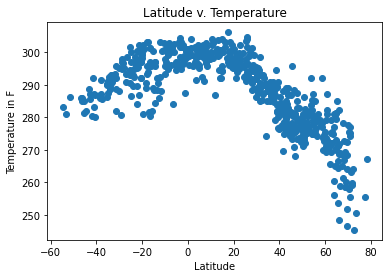

In [61]:
#lat versus temp scatter
plt.scatter(city_df["Lat"],city_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Temperature in F")
plt.title("Latitude v. Temperature")
plt.show()

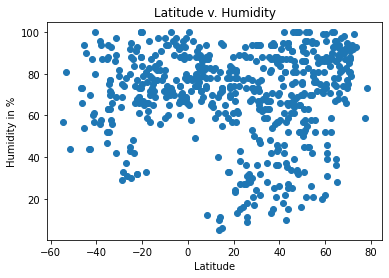

In [63]:
#lat versus humidity scatter
plt.scatter(city_df["Lat"],city_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity in %")
plt.title("Latitude v. Humidity")
plt.show()

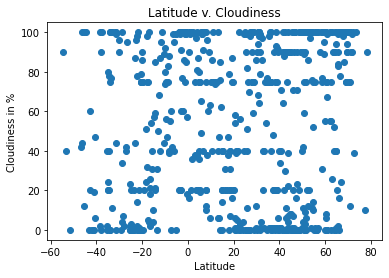

In [64]:
#lat versus cloudiness scatter
plt.scatter(city_df["Lat"],city_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness in %")
plt.title("Latitude v. Cloudiness")
plt.show()

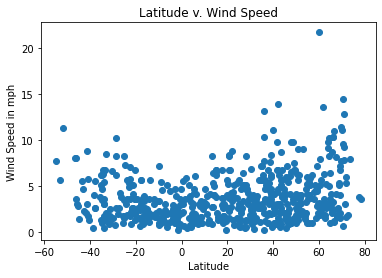

In [65]:
#lat versus wind scatter
plt.scatter(city_df["Lat"],city_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed in mph")
plt.title("Latitude v. Wind Speed")
plt.show()